# Gilled Mushrooms from Agaricus and Lepiota families - exploratory analysis

<table cellpadding="0" cellspacing="0" border="0" width = 100%>
<tbody>
<tr>
<td style="text-align:right; width:150px" colspan ="1"><p style="text-align:left">The dataset of etable and poisonous mushrooms species of Agaricus and Lepiota families was downloaded from UCI Machine Learning Repository <a href="https://archive.ics.uci.edu/ml/datasets/mushroom">"Mushrom Dataset"</a>. Records were originally drawn from The Audubon Society Field Guide to North American Mushrooms publsihed in 1981.<br><br>

The data includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as edible (e) or poisonous (p). Some 'unknown edibility' mushrooms were classified as poisonous as well. The Guide states that there is no simple rule for determining the edibility of a mushroom. <br><br>

The dataset contains 8124 instances and 22 attributes with some missing values coded as "?". The download gives two text files: 1) data set description along with detailed attributes information and 2) data iteself, each instance represented as a row, and 23 columns separated by commas, where the value of the first column is the classification of the instance ('p' or 'e'). <br><br>

I will make an attempt to obtain the most important and/or easy to identify features that would help to distinguish etable from poisonous mushrooms and come up with with a predictive algorithm that would take human description of a mushroom and predict its classification.</p></td>
<td valign="right" style="width:170px;" colspan="1"><img src="images/parts_of_a_mushroom.gif" alt="Mushrooms" /></td>
</tr>
</tbody>
</table>



__"Exploratory Analysis" notebook__:

* Using pandas, numpy and matplotlib, define types of data, display descriptive statistics of the dataset and look for missing values.


* Recoding unique values of some features for easier use later and save as metadata file .json.


* Briefly talk about what qualities of mushrooms (features) could be the easiest to identify from practical point of view versus statistical. Formal important feature identification is conducted in the second step of analysis: __"Feature Selection"__. 

In [1]:
import re, csv, os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sklearn
%matplotlib inline

In [2]:
file = open('/Users/dariaulybina/Desktop/georgetown/ml_practice/agaricus-lepiota.txt', 'r')
#file = open('U:\\agaricus-lepiota.txt', 'r')
list1 = []
for f in file:
    l = f.split(',')
    li = [x.strip() for x in l]
    list1.append(li)
file.close()

In [3]:
print(len(list1))

8124


8124 instances in my datafile is confirmed. <br>

Below is the list of features and their coding copied from the database description file. 

__1. cap-shape:__ bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s <br>
__2. cap-surface:__ fibrous=f,grooves=g,scaly=y,smooth=s <br>
__3. cap-color:__ brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y <br>
__4. bruises?:__ bruises=t,no=f  <br>
__5. odor:__ almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s  <br>
__6. gill-attachment:__ attached=a,descending=d,free=f,notched=n  <br>
__7. gill-spacing:__ close=c,crowded=w,distant=d  <br>
__8. gill-size:__ broad=b,narrow=n  <br>
__9. gill-color:__ black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y  <br>
__10. stalk-shape:__ enlarging=e,tapering=t <br>
__11. stalk-root:__ bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=? <br>
__12. stalk-surface-above-ring:__ fibrous=f,scaly=y,silky=k,smooth=s <br>
__13. stalk-surface-below-ring:__ fibrous=f,scaly=y,silky=k,smooth=s <br>
__14. stalk-color-above-ring:__ brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y <br>
__15. stalk-color-below-ring:__ brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y <br>
__16. veil-type:__ partial=p,universal=u <br>
__17. veil-color:__ brown=n,orange=o,white=w,yellow=y <br>
__18. ring-number:__ none=n,one=o,two=t <br>
__19. ring-type:__ cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z <br>
__20. spore-print-color:__ black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y <br>
__21. population:__ abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y <br>
__22. habitat:__ grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d <br>



In [6]:
headers = ['classif','cap_shape','cap_surface','cap_colour','bruises','odor','gill_attach','gill_space','gill_size',
           'gill_color','stalk_shape','stalk_root','stalk_surf_above_ring','stalk_surf_below_ring',
           'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color','ring_number',
           'ring_type','spore_print_color','population','habitat']
print(len(headers))

23


In [7]:
#Put the list of lists into dataframe and make sure everything look ok
df = pd.DataFrame(list1, columns=headers)
df.head()

,classif,cap_shape,cap_surface,cap_colour,bruises,odor,gill_attach,gill_space,gill_size,gill_color,...,stalk_surf_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
df.describe()

,classif,cap_shape,cap_surface,cap_colour,bruises,odor,gill_attach,gill_space,gill_size,gill_color,...,stalk_surf_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


As expected, all of the values across all features are categorical. Later, I have encode those into numerical values. 

In [8]:
table = pd.crosstab(index=df['classif'], columns="count")
table

col_0,count
classif,
e,4208
p,3916


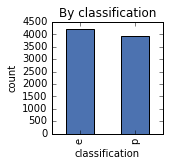

In [9]:
fig = plt.figure(figsize=(2,2))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('classification')
ax1.set_ylabel('count')
ax1.set_title("By classification")
df['classif'].value_counts().plot(kind='bar',color = '#4C72B0')

__Comments:__<br><br>
There are 4208 mushroom instances identified as etable and 3916 instances as poisonous. The distribution between my two target classes is approximately the same, which is good - we won't have a selection bias tending towards one category just due to its overrepresentation in the dataset. <br>

I will explore other properties of mushrooms and create box or stacked charts to vizualise data. 

In [10]:
tbl = pd.crosstab(index=df['classif'], columns=df['cap_colour'])
print(tbl)

cap_colour    b   c    e     g     n   p   r   u    w    y
classif                                                   
e            48  32  624  1032  1264  56  16  16  720  400
p           120  12  876   808  1020  88   0   0  320  672


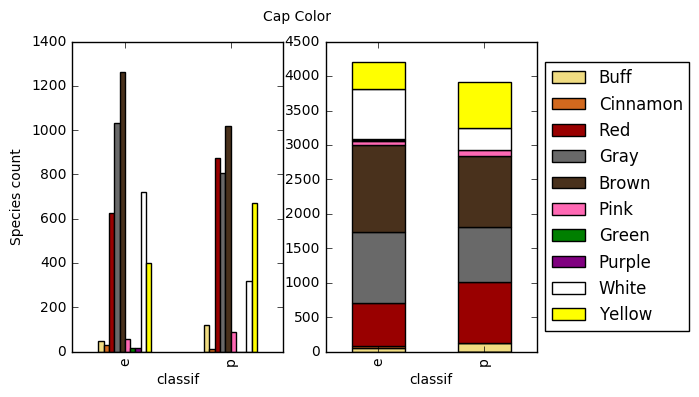

In [42]:
#Create stacked chart and normal box chart to display the distribution of different cap colors by classification
fig, axes = plt.subplots(nrows=1, ncols=2)
tbl.plot(kind="bar",stacked=False, ax=axes[0], color=['#f0dc82', '#D2691E', '#990000',
                                                          '#696969','#49311c','#ff69b4',
                                                          '#007f00','#800080','#ffffff',
                                                         '#ffff00']);
axes[0].legend_.remove()
tbl.plot(kind="bar",stacked=True, ax=axes[1], color=['#f0dc82', '#D2691E', '#990000',
                                                          '#696969','#49311c','#ff69b4',
                                                          '#007f00','#800080','#ffffff',
                                                         '#ffff00']);
axes[1].legend(['Buff','Cinnamon','Red','Gray','Brown',
                'Pink','Green','Purple','White','Yellow'],loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle('Cap Color')
axes[0].set_ylabel('Species count')
plt.show()
fig.savefig('cap_color.jpg')

__Comment__:

Suprisingly, the cap color is not the great predictor of etability of a mushroom. Different colors have varied distributions among both classes. Just a few species with red and yellow caps tend to be poisonous more often, while brown, gray and white caps are more prevailant among etable mushrooms. However, one cannot draw any definitive conclusion and we need to investgate more charactristics. 

In [44]:
gills = pd.crosstab(index=df['classif'], columns=df["gill_color"])
print(gills)
#gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
s1 = pd.crosstab(index=df['classif'], columns = df['gill_size'])
print(s1)

gill_color     b   e    g    h    k    n   o    p   r    u    w   y
classif                                                            
e              0  96  248  204  344  936  64  852   0  444  956  64
p           1728   0  504  528   64  112   0  640  24   48  246  22
gill_size     b     n
classif              
e          3920   288
p          1692  2224


<table cellpadding="0" cellspacing="0" border="0" width = 100%>
<tbody>
<tr>
    <td style="text-align:right; width:150px" colspan ="1"><p style="text-align:left"><b>Comments:</b><br><br>Gill sizes seem to be equally distributed among poisonous mushrooms, although we can see that the majority of mushrooms that are etable will have broad gill sizes. <br><br> Colors of gills seem to vary greatly, however, one can notice that only etable mushrooms have red or orange colored gilles - they are safe to eat. Few of poisonous mushrooms have green gills - that could be a very certain identification of a poisonous type (Picture - False Parasol with green gills). Additionally, the most occuring color of gills among poisonous mushrooms is buff - and you can be certain that no etable mushroom will have buff gills as well.</p>
<td valign="right" style="width: 170px; " colspan="1"><img style="height:250px;width:350px;" align="top" src=" images/green_gilled_parasol.jpg" alt="Mushrooms" /></td></tr>
</tbody>
</table>



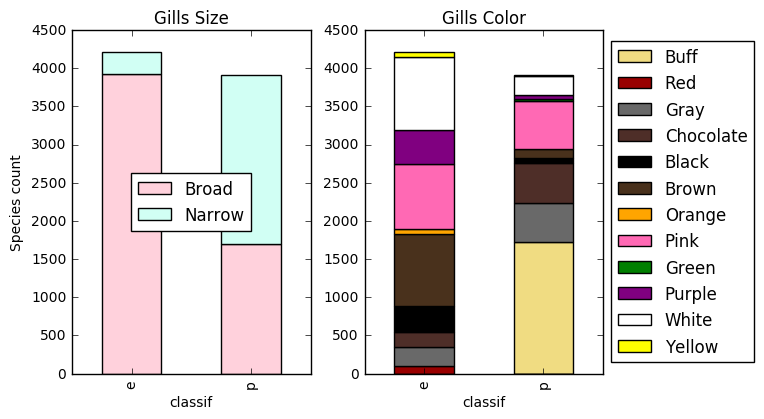

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.tight_layout()
gills.plot(kind="bar",stacked=True, ax=axes[1], color=['#f0dc82','#990000','#696969','#4E2E28','#000000',
                                                        '#49311c','#FFA500','#ff69b4','#007f00','#800080',
                                                        '#ffffff','#ffff00'])
axes[1].legend(['Buff','Red','Gray','Chocolate','Black','Brown','Orange','Pink',
           'Green','Purple','White','Yellow'],loc='center left', bbox_to_anchor=(1, 0.5))
axes[1].set_title('Gills Color')
axes[0].set_ylabel('Species count')

s1.plot(kind="bar",stacked=True, ax=axes[0], color=['#ffd1dc','#d1fff4'])
axes[0].set_title('Gills Size')
axes[0].legend(['Broad','Narrow'],loc='center')
plt.show()
fig.savefig('gills_color_size.jpg')

In [62]:
odors = pd.crosstab(index=df['classif'], columns=df["odor"])
print(odors)

odor       a    c     f    l   m     n    p    s    y
classif                                              
e        400    0     0  400   0  3408    0    0    0
p          0  192  2160    0  36   120  256  576  576


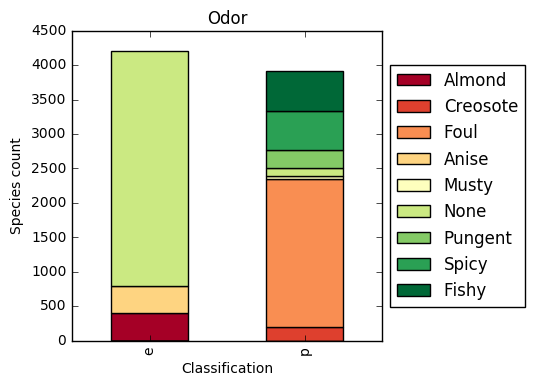

In [72]:
#almond=a,creosote=c,anise=l,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
od = odors.plot(kind="bar",figsize=(4,4),stacked=True, cmap=plt.cm.RdYlGn)
od.set_title('Odor')
od.set_ylabel('Species count')
od.set_xlabel('Classification')
od.legend(['Almond','Creosote','Foul','Anise',
           'Musty','None','Pungent','Spicy','Fishy'], loc='center left', bbox_to_anchor=(1, 0.5))
fig.savefig('odor.jpg')

__Comments:__<br>

Odor seems to be very important in differentiating between posonous and not-poisonous mushrooms in our dataset. If the mushroom smells like almond or like anise - it is indeed etable. If there is no smell at all - the mushroom will be most likely etable, but you cannot be sure: out of all mushrooms that don't have a smell, poisonous represent about 3.5 %. Additionally, only poisonous mushrooms smell like fish, spicy, pungent, foul, creosote and musty. Although sometimes difficult to identify, smell is indeed an important feature. 

In [74]:
veils = pd.crosstab(index=df['classif'], columns=df["veil_color"])
print(veils)
spores = pd.crosstab(index=df['classif'], columns=df["spore_print_color"])
print(spores)

veil_color   n   o     w  y
classif                    
e           96  96  4016  0
p            0   0  3908  8
spore_print_color   b     h     k     n   o   r   u     w   y
classif                                                      
e                  48    48  1648  1744  48   0  48   576  48
p                   0  1584   224   224   0  72   0  1812   0


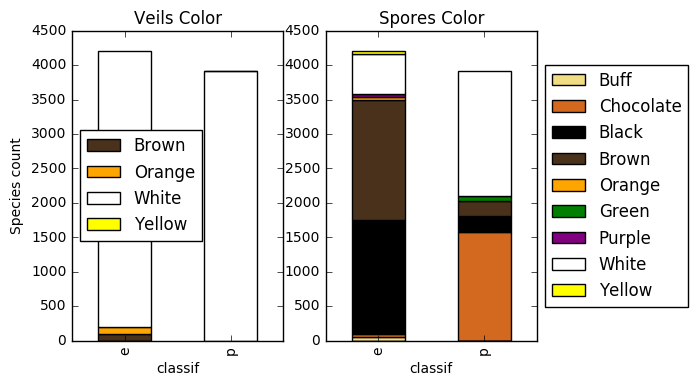

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=2)
veils.plot(kind="bar",stacked=True, ax=axes[0], color=['#49311c','#ffa500','#ffffff','#ffff00']);
axes[0].legend(['Brown','Orange','White','Yellow'],loc='center left')


spores.plot(kind="bar",stacked=True, ax=axes[1], color=['#f0dc82','#D2691E','#000000','#49311c',
                                                        '#ffa500','#007f00','#800080','#ffffff','#ffff00']);
axes[1].legend(['Buff','Chocolate','Black','Brown','Orange',
                'Green','Purple','White','Yellow'],loc='center left', bbox_to_anchor=(1, 0.5))

axes[0].set_ylabel('Species count')
axes[0].set_title('Veils Color')
axes[1].set_title('Spores Color')
plt.show()
fig.savefig('veils_spores_colors.jpg')

<table cellpadding="0" cellspacing="0" border="0" width = 100%>
<tbody>
<tr>
    <td style="text-align:right; width:150px" colspan ="1"><p style="text-align:left"><b>Comments:</b><br><br>Only etable mushrooms have veils of brown or orange color - you can safely eat those. However, both etable and poisonous mushrooms have white veils. If the veil is yellow - the mushroom will be identified as posinous with 100 % certainty.<br><br>The color of spores provides a better picture - if spores are buff, orange yellow - the species must be etable. If spores arw green - mushroom is poisonous in all of the cases. Most etable mushrooms have brown or black spores and most poisonous ones - white and chocolate. <br><br>It might be a little difficult to distinguish between the brown or chocolate color, however, spore color feature might become statitically important. Additionally, the color disccussed - a 'print' color - is difficult and time-consuming to obtain. One will need to collect a mushroom and leave the cup under the glass for almost a day to get a pattern with a print color.</p>
<td valign="right" style="width: 170px; " colspan="1"><img style="height:250px;width:350px;" align="top" src="images/spores.jpg" alt="Mushrooms" /><img style="height:250px;width:350px;" align="bottom" src="images/veil.png" /></td></tr>
</tbody>
</table>

In [80]:
stalk_above = pd.crosstab(index=df['classif'], columns=df["stalk_color_above_ring"])
print(stalk_above)
stalk_below = pd.crosstab(index=df['classif'], columns=df["stalk_color_below_ring"])
print(stalk_below)

stalk_color_above_ring    b   c   e    g    n    o     p     w  y
classif                                                          
e                         0   0  96  576   16  192   576  2752  0
p                       432  36   0    0  432    0  1296  1712  8
stalk_color_below_ring    b   c   e    g    n    o     p     w   y
classif                                                           
e                         0   0  96  576   64  192   576  2704   0
p                       432  36   0    0  448    0  1296  1680  24


__Comemnts:__<br>

Stalk colors above and below vary vetween etable and poisonous mushrooms, however, there are rules one can follow to certainly distinguish them using stalk color features. If the stalk color (both above and below the ring) is buff, yellow or cinnamon in color - the mushrom has to be poisonous. All mushrooms that have their stalks red, gray or orange are etable. 


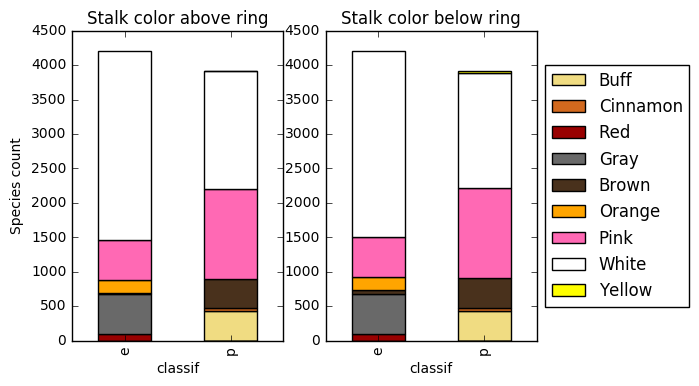

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=2)
stalk_above.plot(kind="bar",stacked=True, ax=axes[0], color=['#f0dc82','#D2691E', '#990000','#696969',
                                                             '#49311c','#ffa500','#ff69b4','#ffffff','#ffff00']);
axes[0].legend_.remove()

stalk_below.plot(kind="bar",stacked=True, ax=axes[1], color=['#f0dc82','#D2691E', '#990000','#696969',
                                                             '#49311c','#ffa500','#ff69b4','#ffffff','#ffff00']);
axes[1].legend(['Buff','Cinnamon','Red','Gray','Brown','Orange','Pink','White','Yellow'],loc='center left', bbox_to_anchor=(1, 0.5))

axes[0].set_ylabel('Species count')
axes[0].set_title('Stalk color above ring')
axes[1].set_title('Stalk color below ring')
plt.show()
#fig.savefig('stalk_colors.jpg')

In [17]:
hab = pd.crosstab(index=df['classif'], columns=df["habitat"])
print(hab)
pop = pd.crosstab(index=df['classif'], columns=df["population"])
print(pop)

habitat     d     g    l    m     p    u    w
classif                                      
e        1880  1408  240  256   136   96  192
p        1268   740  592   36  1008  272    0
population    a    c    n    s     v     y
classif                                   
e           384  288  400  880  1192  1064
p             0   52    0  368  2848   648


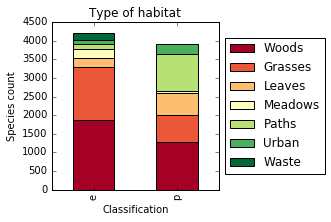

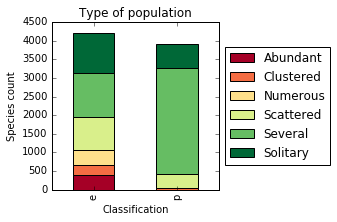

In [19]:
a = hab.plot(kind="bar",stacked=True,figsize=(3,3), cmap=plt.cm.RdYlGn);
a.legend(['Woods','Grasses','Leaves','Meadows',
                'Paths','Urban','Waste'],loc='center left',bbox_to_anchor=(1, 0.5))
a.set_ylabel('Species count')
a.set_xlabel('Classification')
a.set_title('Type of habitat')
plt.show()

fig.savefig('habitat.jpg')
p = pop.plot(kind="bar",stacked=True, figsize=(3,3), cmap=plt.cm.RdYlGn);
p.legend(['Abundant','Clustered','Numerous','Scattered',
                'Several','Solitary'],loc='center left', bbox_to_anchor=(1, 0.5))

p.set_ylabel('Species count')
p.set_xlabel('Classification')
p.set_title('Type of population')
plt.show()
fig.savefig('population.jpg')


<table cellpadding="0" cellspacing="0" border="0" width = 100%>
<tbody>
<tr>
<td style="text-align:right; width:150px" colspan ="1"><p style="text-align:left"><b>Comments:</b><br><br>Well, regarding habitat feature, the "good" news ia that no poisonous mushrooms grow in waste. Also, a large proportion of poisonous species grows on paths and barely on meadows. There are more etable mushrooms in woods and grass, but poisonous mushrooms occur in those environments as well. Among leaves you would mostly have poisonous mushrooms.<br> In case you see a 'abundant' amount of mushrooms or 'numerous' of them - they have to be be etable, poisonous once don't grow in those manners. However clustered and scattered and solitary populations occur among poisonous mushrooms as well as in etable ones. If you see just several mushrooms  - be careful, most poisonous mushrooms belong to that type of population distribution. Despite its potential relevance, I would have issues distinguishing between population categories, this feature is irrelevant from practical point of view.</p></td>
<td valign="right" style="width:170px;" colspan="1"><img src="images/toadstool.jpg" alt="Mushrooms" /></td>
</tr>
</tbody>
</table>

ring_type     e   f     l   n     p
classif                            
e          1008  48     0   0  3152
p          1768   0  1296  36   816


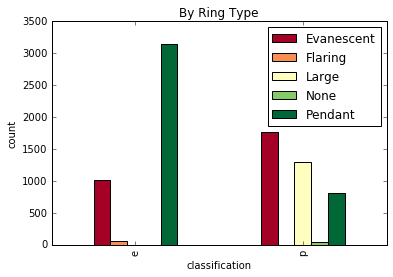

In [20]:
ring = pd.crosstab(index=df['classif'], columns=df["ring_type"])
print(ring)

r = ring.plot(kind='bar', cmap=plt.cm.RdYlGn)
r.set_xlabel('classification')
r.set_ylabel('count')
r.set_title("By Ring Type")
r.legend(['Evanescent','Flaring','Large','None','Pendant'])
plt.show()

<table cellpadding="0" cellspacing="0" border="0" width = 100%>
<tbody>
<tr>
<td style="text-align:right; width:150px" colspan ="1"><p style="text-align:left"><b>Comments:</b><br><br>There are less different ring types observed in the sample dataset comparing with metadata information. However, this feature might be important for the classification. Many (but not all!) etable mushrooms have pendant ring type and only etable mushrooms have flaring type. If no ring observed at all, or the ring is large - the mushroom is poisonous!  </p></td>
<td valign="right" style="width:170px;" colspan="1"><img src="images/ring_type.jpg" alt="Mushrooms" /></td>
</tr>
</tbody>
</table>

gill_space     c     w
classif               
e           3008  1200
p           3804   112


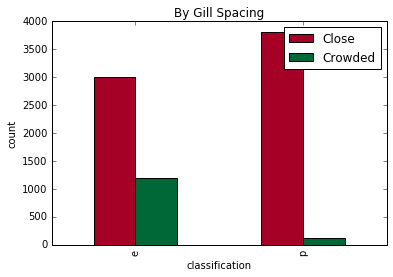

In [28]:
#gill-spacing: close=c,crowded=w,distant=d 
gsp = pd.crosstab(index=df['classif'], columns=df["gill_space"])
print(gsp)

r = gsp.plot(kind='bar', cmap=plt.cm.RdYlGn)
r.set_xlabel('classification')
r.set_ylabel('count')
r.set_title("By Gill Spacing")
r.legend(['Close','Crowded'])
plt.show()

<table cellpadding="0" cellspacing="0" border="0" width = 100%>
<tbody>
<tr>
<td style="text-align:right; width:150px" colspan ="1"><p style="text-align:left"><b>Comments:</b><br><br>Metadata defined 3 categories but we have only 2 types of gill spacing observed: close and distant. This feature might be important as there is significantly more etable mushrooms with distant gill spacing.</p></td>
<td valign="right" style="width:170px;" colspan="1"><img src="images/gill_spacing.jpeg" alt="Mushrooms" /></td>
</tr>
</tbody>
</table>

### Recode unique values of different feature

Replacement of "1-letter" values with "1-word" values for easier Model Operation application later. <br>

The choice of values to recode is not random - it is based on features identified as the most important in the 'feature_selection' notebook as well as my choice of the most 'practical' features. <br>

In [9]:
df['population'].replace(['a','c','n','s','v','y'],['Abundant','Clustered','Numerous',
                                                    'Scattered','Several','Solitary'],inplace=True)
df['habitat'].replace(['d','g','l','m','p','u','w'],['Woods','Grasses','Leaves',
                                                     'Meadows','Paths','Urban','Waste'],inplace=True)
df['cap_colour'].replace(['b','c','e','g','n','p','r','u','w','y'],['Buff','Cinnamon','Red','Gray',
                                                                    'Brown','Pink','Green','Purple',
                                                                    'White','Yellow'],inplace=True)
df['spore_print_color'].replace(['b','h','k','n','o','r','u','w','y'],['Buff','Chocolate','Black','Brown',
                                                                      'Orange','Green','Purple','White','Yellow'],inplace=True)
df['odor'].replace(['a','c','f','l','m','n','p','s','y'],['Almond','Creosote','Foul','Anise','Musty',
                                                          'None','Pungent','Spicy','Fishy'],inplace=True)
df['gill_color'].replace(['b','e','g','h','k','n','o','p','r','u','w','y'],['Buff','Red','Gray','Chocolate','Black',
                                                                            'Brown','Orange','Pink','Green','Purple',
                                                                            'White','Yellow'],inplace=True)
df['stalk_surf_above_ring'].replace(['f','k','s','y'],['Fibrous','Silky','Smooth','Scaly'],inplace=True)
df['gill_size'].replace(['b','n'],['Broad','Narrow'],inplace=True)
df['bruises'].replace(['f','t'],['No','Bruises'],inplace=True)
df['stalk_color_above_ring'].replace(['b','c','e','g','n','o','p','w','y'],['Buff','Cinnamon','Red','Gray','Brown',
                                                                            'Orange','Pink','White','Yellow'],inplace=True)  
df['stalk_color_below_ring'].replace(['b','c','e','g','n','o','p','w','y'],['Buff','Cinnamon','Red','Gray','Brown',
                                                                            'Orange','Pink','White','Yellow'],inplace=True)
df['gill_space'].replace(['c','w'],['Close', 'Crowded'],inplace=True)
df['ring_type'].replace(['e','f','l','n','p'],['Evanescent','Flaring','Large','None','Pendant'],inplace=True)
df['classif'].replace(['e','p'],['Etable', 'Poisonous'],inplace=True)

In [10]:
df.head()

,classif,cap_shape,cap_surface,cap_colour,bruises,odor,gill_attach,gill_space,gill_size,gill_color,...,stalk_surf_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,Poisonous,x,s,Brown,Bruises,Pungent,f,Close,Narrow,Black,...,s,White,White,p,w,o,Pendant,Black,Scattered,Urban
1,Etable,x,s,Yellow,Bruises,Almond,f,Close,Broad,Black,...,s,White,White,p,w,o,Pendant,Brown,Numerous,Grasses
2,Etable,b,s,White,Bruises,Anise,f,Close,Broad,Brown,...,s,White,White,p,w,o,Pendant,Brown,Numerous,Meadows
3,Poisonous,x,y,White,Bruises,Pungent,f,Close,Narrow,Brown,...,s,White,White,p,w,o,Pendant,Black,Scattered,Urban
4,Etable,x,s,Gray,No,None,f,Crowded,Broad,Black,...,s,White,White,p,w,o,Evanescent,Brown,Abundant,Grasses


### Missing values in stalk_root feature 

There are 2480 missing values under the feature __stalk_root__. I will drop the feature from the beginning to avoid droping samples associated with those missing values.

Alternatively, it is possible to keep the feature and drop all observations where the value is missing:
df = df.drop(df[df['stalk_root']=='?'].index

In [ ]:
df['stalk_root'].value_counts()

The crosstab display doesn't demonstrate a type a stalk_root that would be prevailent in poisonous mushrooms. If it was the case, I would assign all the missing values with that stalk root type to avoid risks of classifying poisonous mushroom as etable based on tha feature. Another option could be to assign the values of the mode - 'b', but the most common value occures often in both 'e' and 'p' classified mushrooms.

__Final decision:__

Drop this feature. After doing some feature analysis, I found out that stalk root qualities were not determinant for distinguishing between etable and poisonous mushrooms. 

In [25]:
sr = pd.crosstab(index=df['classif'], columns=df["stalk_root"])
print(sr)

stalk_root     ?     b    c    e    r
classif                              
e            720  1920  512  864  192
p           1760  1856   44  256    0


In [26]:
df.drop('stalk_root', axis=1, inplace=True)

Save data to csv

In [32]:
df.to_csv('/Users/dariaulybina/Desktop/georgetown/ml_practice/data/data.csv')